# Cats and Dogs CNN

**Description:** Classify cats and dogs with a simple Convolutional Network<br>
                 
**Dataset:** Kaggle Dogs vs Cats dataset originally from Microsoft <br>
<br>
Try to get as close as possible to 90%

In [1]:
%matplotlib inline
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # to avoid warning messages


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras import Input
from tensorflow.keras.layers import ReLU, Dense, Softmax, Rescaling, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import image_dataset_from_directory

import numpy as np


import sys
sys.stderr = open('err.txt', 'w')

I0000 00:00:1739724978.027181   39912 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1739724978.044879   39912 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1739724978.044924   39912 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1739724978.049555   39912 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1739724978.049613   39912 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
C

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0

#### **Directories**
Reads the Cats and Dogs dataset and loads in. Creating a PetImages folder with two subfolders Cat and Dog <bbr>
Don't repeat this step as with the files/folders created it may have some issues

In [2]:
# DELETE THIS CELL IF YOU DON'T HAVE A GPU
# Activate GPU
from tensorflow.python.client import device_lib
from tensorflow.config import list_physical_devices
print('Num GPUs Available: ',len(list_physical_devices('GPU')))
devices = device_lib.list_local_devices()
gpu_devices = [device for device in devices if device.device_type == 'GPU']
for gpu in gpu_devices:
    print('Using', gpu.physical_device_desc)

Num GPUs Available:  1
Using device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:22:00.0, compute capability: 8.6


In [3]:
# Execute this cell only once
# Loading the dataset from microsoft cloud - do it only once
#!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
#!unzip -q kagglecatsanddogs_5340.zip

#### **Cleaning data**
Just for security we delete some photos that may have the header corrupted.

In [4]:
num_skipped = 0
num_images = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)
        else:
            num_images += 1

print(f"Deleted {num_skipped} images.")
print(f"There are {num_images} clean images.")

Deleted 0 images.
There are 23412 clean images.


#### **Preparing the data**

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.map_op._MapDataset'>


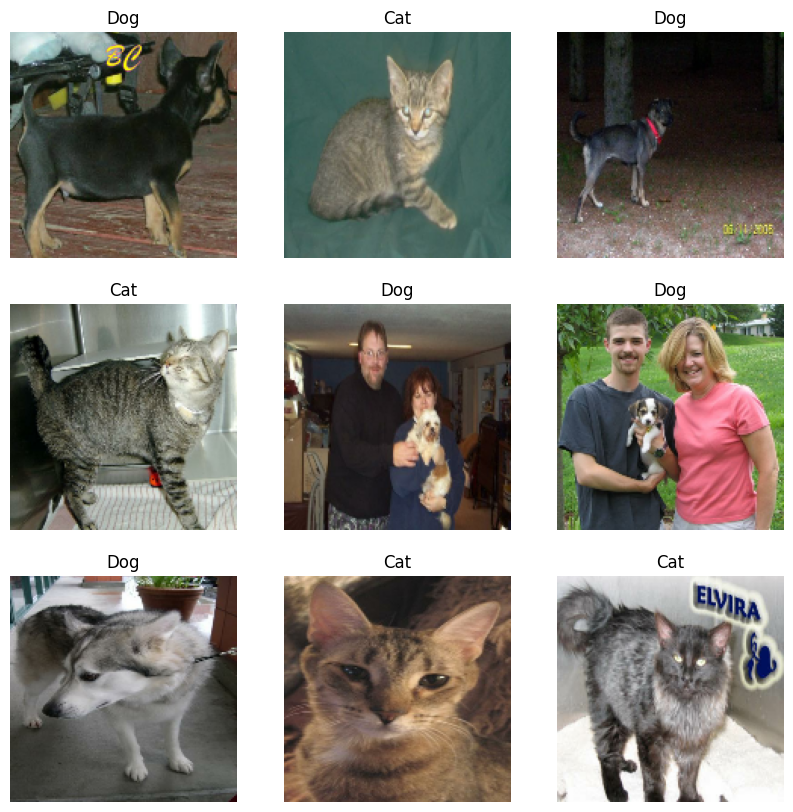

In [5]:
batch_size = 32
img_height = 150  
img_width  = 150
train_dir = './PetImages/'
class_names = ['Cat', 'Dog']

train_dataset = image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset = 'training',
    label_mode = 'int',
    seed = 123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset = 'validation',
    label_mode = 'int',
    seed = 123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Check images

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        
        
# Optional: Normalize pixel values (0-255 to 0-1)
normalization_layer = Rescaling(1./255)

print (type(train_dataset))
train_dataset        = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset   = validation_dataset.map(lambda x, y: (normalization_layer(x), y))
print (type(train_dataset))

#### **Network Architecture Definition**

In [ ]:
# Define a larger CNN architecture inspired by VGG16
img_input = layers.Input(shape=(150, 150, 3))

# Block 1
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(img_input)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Block 2
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Block 3
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Block 4
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Block 5
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Fully connected layers
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)

# Output layer
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])
model.summary()

In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
# img_input = layers.Input(shape=(150, 150, 3))

# Block 1
# x = layers.Conv2D(64, (5,5), activation='relu')(img_input)
# x = layers.MaxPooling2D(4)(x)

# Flatten feature map to a 1-dim tensor
# x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
# x = layers.Dense(64, activation='relu')(x)

# x = layers.Dropout(0.5)(x)

# output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
# model = Model(img_input, output)
# model.compile(loss='binary_crossentropy',
#               optimizer=RMSprop(learning_rate=0.001),
#               metrics=['acc'])
# model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 146, 146, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 34, 34, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 5, 5, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,065 (250.25 KB)

 Trainable params: 64,065 (250.25 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# training the network

In [8]:
#Callbacks - early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # Log when training is stopped
    mode='min',          # Stop training when the monitored quantity has stopped decreasing
    restore_best_weights = True  # Restore model weights from the epoch with the best value of the monitored quantity
)

In [9]:
history = model.fit(
      train_dataset,
      epochs=150,
      validation_data=validation_dataset, callbacks=[early_stopping])

Epoch 1/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - acc: 0.4795 - loss: 0.6952 - val_acc: 0.5107 - val_loss: 0.6919
Epoch 2/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.5094 - loss: 0.6937 - val_acc: 0.5107 - val_loss: 0.6917
Epoch 3/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.5131 - loss: 0.6933 - val_acc: 0.5557 - val_loss: 0.6890
Epoch 4/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.5493 - loss: 0.6880 - val_acc: 0.6111 - val_loss: 0.6628
Epoch 5/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.5977 - loss: 0.6660 - val_acc: 0.5950 - val_loss: 0.6612
Epoch 6/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.6213 - loss: 0.6496 - val_acc: 0.6508 - val_loss: 0.6252
Epoch 7/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.6609 - loss: 0.6118 - val_acc: 0.6630 - val_loss: 0.6124
Epoch 8/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.6560 - loss: 0.6196 - val_acc: 0.6450 - val_loss: 0.6397
Epoch 9/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 

Epoch 54/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.8393 - loss: 0.3648 - val_acc: 0.8377 - val_loss: 0.3969
Epoch 55/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.8558 - loss: 0.3442 - val_acc: 0.8101 - val_loss: 0.4292
Epoch 56/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.8488 - loss: 0.3426 - val_acc: 0.8227 - val_loss: 0.4168
Epoch 57/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.8532 - loss: 0.3507 - val_acc: 0.8439 - val_loss: 0.3728
Epoch 58/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.8624 - loss: 0.3283 - val_acc: 0.7651 - val_loss: 0.7152
Epoch 59/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.8709 - loss: 0.3210 - val_acc: 0.7721 - val_loss: 0.5252
Epoch 60/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - acc: 0.8409 - loss: 0.3613 - val_acc: 0.8178 - val_loss: 0.4086
Epoch 61/150
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.8492 - loss: 0.3284 - val_acc: 0.8411 - val_loss: 0.3680
Epoch 62/150
100/100 ━━━━━━━━━━━━

#### **Evaluate the Results**

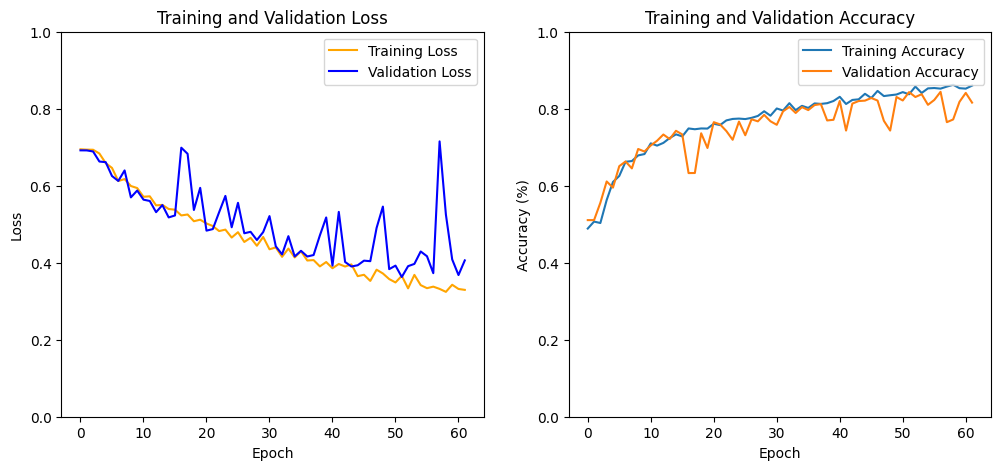

In [10]:
# Plot training loss, accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='orange')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.ylim(0,1)
plt.legend()
plt.show()


#### **Generate Confusion Matrix**

In [11]:
# Generate predictions for the validation dataset
y_true = []
y_pred = []

for images, labels in validation_dataset:
    y_true.extend(labels.numpy())  # True labels
    preds = model.predict(images, verbose=0)  # Model predictions
    y_pred.extend((preds > 0.5).astype(int))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

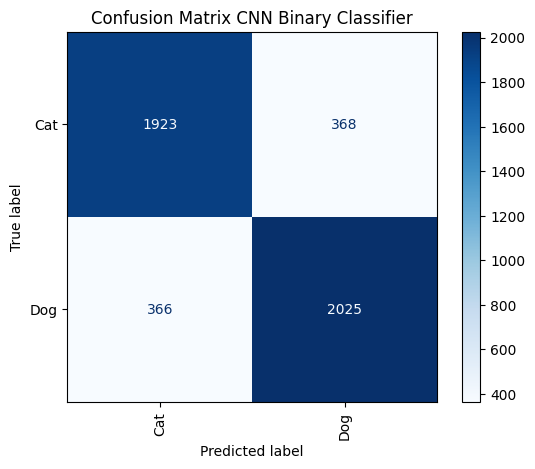

In [12]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")
plt.title("Confusion Matrix CNN Binary Classifier")
plt.show()

In [13]:
# Final accuracy
print('final accuracy test:', history.history['acc'][-1])
print('final accuracy validation', history.history['val_acc'][-1])

final accuracy test: 0.8600000143051147
final accuracy validation 0.8158906698226929


In [14]:
import session_info
session_info.show(html=False)

-----
keras               3.6.0
matplotlib          3.9.2
numpy               1.26.4
session_info        1.0.0
sklearn             1.5.2
tensorflow          2.17.1
-----
IPython             8.28.0
jupyter_client      8.6.3
jupyter_core        5.7.2
-----
Python 3.12.3 (main, Jan 17 2025, 18:03:48) [GCC 13.3.0]
Linux-5.15.167.4-microsoft-standard-WSL2-x86_64-with-glibc2.39
-----
Session information updated at 2025-02-16 17:58


## Assignment

Increase the size of the convolutional network by adding layers and adding filters to each layer. The new layers may have more filters (this is the first number in the Conv2D layer. In general, the filters grow in a pyramidal structure. Use filters 3x3 but you can increase them as well if you want. Basically create blocks and repeat them. An idea will be to try to replicate a VGG16 architecture. The VGG16 structure is well tested and works very well for images. .

Answer the question What is your best Accuracy? Summarize your experimentation and explain how you ended up in the final best performing architecture.

### Questions to Answer 
1. How do you explain the changes in the accuracy by increasing the architecture size ?
2. What is better more data or better algorithm?
3. How did you get to your final architecture?

## Additional Blocks

In [ ]:
# Define a larger CNN architecture inspired by VGG16
img_input = layers.Input(shape=(150, 150, 3))

# Block 1
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(img_input)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Block 2
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Block 3
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Block 4
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Block 5
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Fully connected layers
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)

# Output layer
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])
model.summary()